In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

In [3]:
p

x,0,0.0101,0.0202,0.0303,0.0404,0.0505,...,0.949,0.96,0.97,0.98,0.99,1
y,0.0804,0.879,0.405,0.566,0.415,0.906,...,0.627,0.927,0.478,0.118,0.131,0.517
a,0,8.97e-05,0.000165,0.00052,0.000677,0.00231,...,0.565,0.854,0.45,0.113,0.128,0.517


In [4]:
p['a']

0,8.97e-05,0.000165,0.00052,0.000677,0.00231,...,0.565,0.854,0.45,0.113,0.128,0.517


In [5]:
np.array(p['a'])

array([0.00000000e+00, 8.97100764e-05, 1.65483738e-04, 5.19603767e-04,
       6.76703435e-04, 2.31142196e-03, 3.25136689e-03, 4.03667209e-03,
       3.87312236e-03, 6.39554835e-03, 6.51311919e-03, 5.74931102e-03,
       8.90589711e-03, 7.16228732e-03, 8.68417655e-03, 1.66930305e-02,
       1.50169312e-02, 2.65694223e-02, 1.96993844e-02, 1.46247114e-02,
       3.36228061e-02, 2.01549206e-02, 3.92066821e-03, 4.21313839e-02,
       5.59791706e-02, 5.32331325e-03, 2.37931857e-02, 1.78385082e-03,
       4.95263223e-02, 7.76088287e-02, 7.41535063e-02, 6.10565890e-02,
       1.80942100e-02, 7.64018223e-02, 8.06568323e-02, 1.15066931e-01,
       1.80279656e-02, 1.93538197e-02, 3.60175638e-02, 5.62709028e-02,
       6.88852768e-02, 4.42465550e-02, 1.21945692e-01, 1.32883185e-01,
       1.63523226e-01, 1.21010834e-02, 7.99219828e-02, 1.20937814e-01,
       2.07332316e-01, 2.11895659e-02, 5.69173977e-02, 2.17408683e-01,
       6.13162891e-02, 9.13930936e-02, 2.39110559e-01, 2.58013510e-02,
      

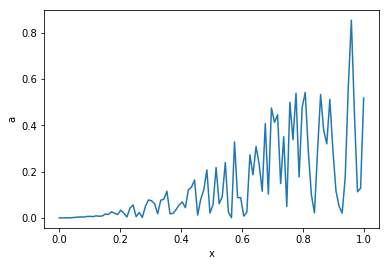

In [6]:
# let's make a simple plot
p.plot('x', 'a')

In [7]:
# different pointdata
p2 = pn.PointData(x=np.random.rand(100))

In [8]:
p2

x,0.811,0.697,0.303,0.274,0.281,0.638,...,0.874,0.105,0.00403,0.11,0.755,0.765


In [9]:
p2 = p.interp(p2)

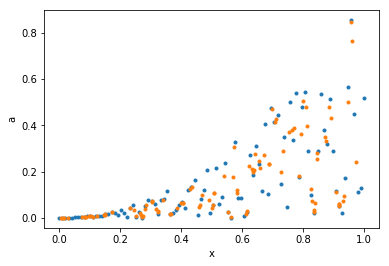

In [10]:
p.plot('x', 'a', '.')
p.interp(p2[['x']], method='linear').plot('x', 'a', '.')

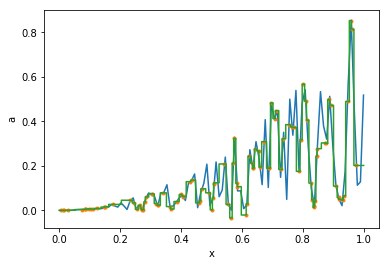

In [13]:
p.plot('x', 'a')
p2.plot('x', 'a', '.')
p2.interp(x=np.linspace(0,1,1000), method='nearest').plot('a')

In [14]:
p.interp(p2)

x,0.811,0.697,0.303,0.274,0.281,0.638,...,0.874,0.105,0.00403,0.11,0.755,0.765
y,0.746,0.994,0.805,0.04,0.48,0.47,...,0.397,0.545,0.735,0.466,0.669,0.645
a,0.49,0.483,0.0741,0.0033,0.0382,0.192,...,0.303,0.00592,8.51e-05,0.00558,0.385,0.374


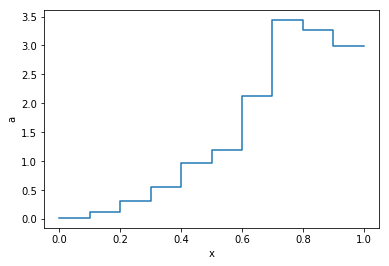

In [16]:
# Generate a histogram function for histograms with weight 'a'
g = p.histogram('x')
g.plot('a')
#g.plot('counts')

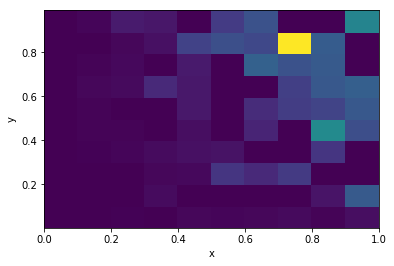

In [17]:
gn = p.histogram('x', 'y')
gn.plot('a')

In [18]:
gn['a']

y \ x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
[0.003 0.102],0,0,0.011,0,0.0333,0.0268,0.0323,0.0492,0.0216,0.0716
[0.102 0.2 ],0,0,0,0.0555,0,0,0,0,0.0998,0.531
[0.2 0.299],0,0,0,0.036,0.0442,0.293,0.218,0.325,0,0
[0.299 0.398],0,0.0146,0.0238,0.0563,0.0799,0.0914,0,0,0.291,0
[0.398 0.496],0.000842,0.0216,0.0202,0,0.0689,0,0.186,0,0.897,0.45
[0.496 0.595],0.00439,0.015,0,0,0.121,0,0.233,0.338,0.378,0.517
[0.595 0.694],0,0.0351,0.0495,0.218,0.122,0,0,0.351,0.512,0.565
[0.694 0.792],0.0064,0.0167,0.0421,0,0.133,0,0.581,0.478,0.533,0
[0.792 0.891],0.00738,0,0.0336,0.0742,0.371,0.457,0.407,1.9,0.542,0
[0.891 0.99 ],0.00231,0.0266,0.134,0.115,0,0.328,0.475,0,0,0.854


In [19]:
np.sum(gn['a'], axis='y')

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
,0.0213,0.13,0.314,0.555,0.973,1.2,2.13,3.44,3.27,2.99


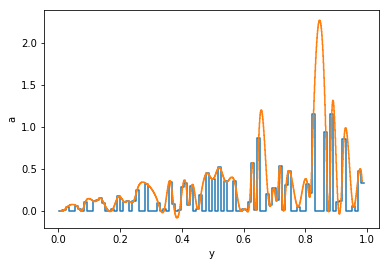

In [20]:
p.histogram(y=100).plot('a')
p.binwise(y=100, function=np.sum, fill_value=np.nan).interp(y=1000, method='cubic').plot('a')

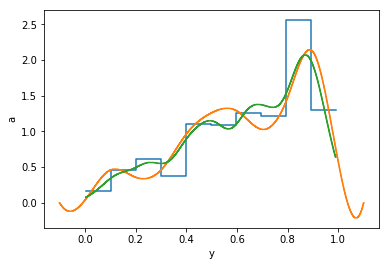

In [21]:
p.histogram('y', density=True).plot('a')
p.histogram(y=np.linspace(-0.1,1.1,13), density=True).interp(y=1000).plot('a')
p.kde(y=1000, density=True, bw=0.05).plot('a')

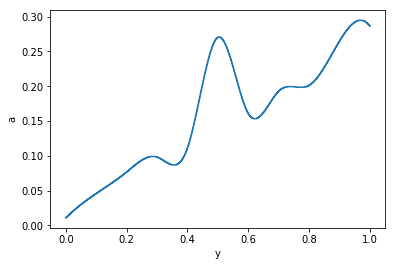

In [25]:
p.binwise(y=np.linspace(-0.1,1.1,13), function=np.mean).interp(y=1000, method='cubic').plot('a')

In [26]:
g = p.histogram(x=10)

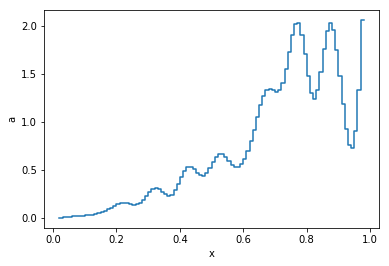

In [46]:
g.interp(x=100).plot('a')

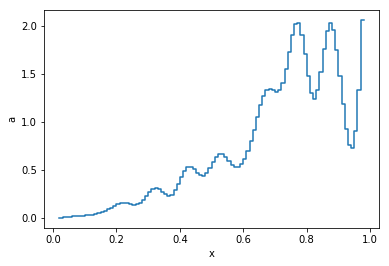

In [47]:
g.interp(x=100).plot('a')

In [24]:
p.histogram(x=10).grid

Grid(
Axis("x",
points = None,
edges = array([[0. , 0.1],
       [0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4],
       [0.4, 0.5],
       [0.5, 0.6],
       [0.6, 0.7],
       [0.7, 0.8],
       [0.8, 0.9],
       [0.9, 1. ]]))
nbins = 10),)

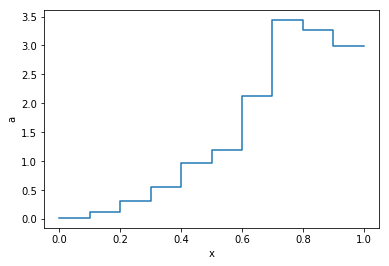

In [33]:
# or in one line
p.histogram('x').plot('a')

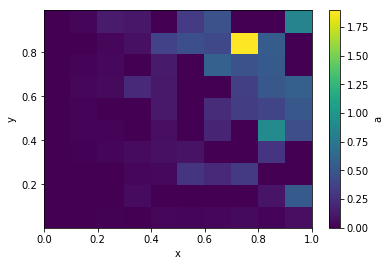

In [34]:
# we can also evaluate the histogram in different dimensions
p.histogram('x', 'y').plot('a', cbar=True)

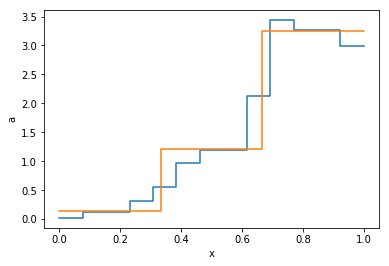

In [37]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('x')
p.histogram('x').resample(x=13).plot('a')
p.histogram('x').resample(x=3).plot('a')


In [38]:
g['a']

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
,0.0213,0.13,0.314,0.555,0.973,1.2,2.13,3.44,3.27,2.99


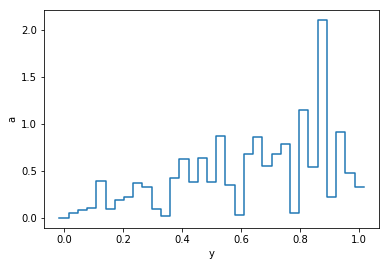

In [40]:
p.histogram(y=np.linspace(0,1,33)).plot('a')

In [41]:
# the returned object is a GridData type
g = p.histogram(x=20)

In [42]:
# it has a grid defined
g

x,[0. 0.05],[0.05 0.1 ],[0.1 0.15],[0.15 0.2 ],[0.2 0.25],[0.25 0.3 ],...,[0.7 0.75],[0.75 0.8 ],[0.8 0.85],[0.85 0.9 ],[0.9 0.95],[0.95 1. ]
y,2.35,3.97,2.56,3.2,3.08,1.98,...,2.7,3.37,1.84,2.65,1.05,2.17
a,0.00145,0.0199,0.037,0.0926,0.156,0.158,...,1.41,2.03,1.24,2.03,0.927,2.06


In [32]:
1//2

0